In [105]:
import pyflac
import wave
import numpy as np
import os
import soundfile as sf



tracks_dir = os.path.join(os.getcwd(), 'tracks')
dos_gardenias_flac_path = os.path.join(tracks_dir, 'dos_gardenias.flac')

audio_data, sample_rate = sf.read(dos_gardenias_flac_path)
audio_data_int16 = (audio_data * np.iinfo(np.int16).max).astype(np.int16)
audio_data_int16_mono = audio_data_int16.mean(axis=1)

left_channel = audio_data_int16[:, 0]
right_channel = audio_data_int16[:, 1]

left_channel_first10 = left_channel[:sample_rate*10]
right_channel_first10 = right_channel[:sample_rate*10]


left_channel_first_second = left_channel[:sample_rate*1]
right_channel_first_second = right_channel[:sample_rate*1]

In [ ]:
left_channel_first_second

5296


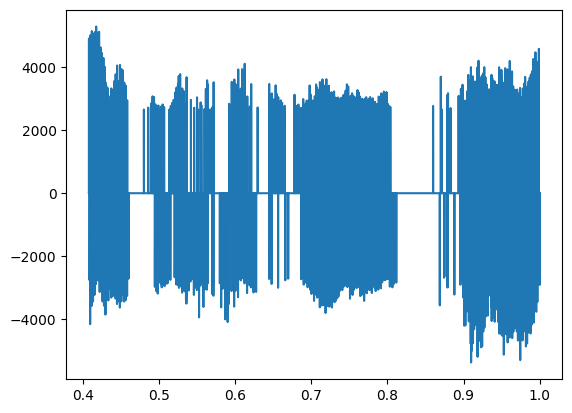

In [106]:
import matplotlib.pyplot as plt

# Filter out small values?
max_amplitude = left_channel_first_second.max()
x = 50
where_sub_x_percent = np.where(np.abs(left_channel_first_second) < (x/100)*max_amplitude)
left_channel_first_second[where_sub_x_percent] = 0
print(max_amplitude)

start_at = 18000
end_at = start_at + int(sample_rate*.05)

signal = left_channel_first_second
signal_spaced_by_framerate = np.linspace(0, int(len(signal)/sample_rate), num=len(signal))

plt.plot(signal_spaced_by_framerate[start_at:],signal[start_at:])

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
[190.90909090909093, 168.1818181818182, 145.45454545454547, 118.18181818181819, 95.45454545454547, 50.00000000000001, 45.45454545454546, 36.36363636363637, 22.72727272727273, 0.0]


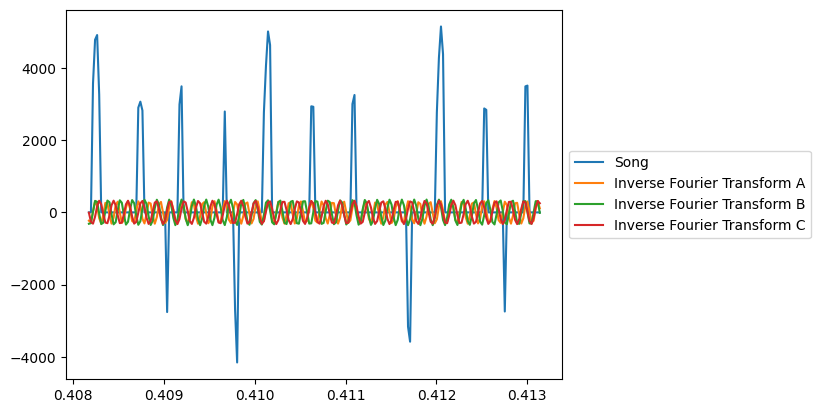

In [107]:
time_step = 0.001

start_at = 18000
end_at = start_at + int(sample_rate*.005)

signal = left_channel_first_second
signal_spaced_by_framerate = np.linspace(0, int(len(signal)/sample_rate), num=len(signal))

signal = signal[start_at:end_at]
signal_spaced_by_framerate = signal_spaced_by_framerate[start_at:end_at]

def get_freqs_above_high_pass(input_signal, n_frequencies=1, threshold=1e-1, breakpoint=10):
    
    complex_zero = 0.00000000e+00+0.j
    
    signal_fft = fftpack.fft(input_signal.copy())    
    amplitude = np.abs(signal_fft)
    sample_freq = fftpack.fftfreq(input_signal.size, d=time_step)
    amplitude_frequency = np.array([amplitude, sample_freq])
    peak_amplitude_positions = list()
    
    top_n_frequencies = list()
    
    amplitude_copy = amplitude.copy()
    count = 1
    while len(top_n_frequencies) < n_frequencies:
        print('Iteration', count)
        
        current_max = amplitude_copy.max()
        #peak_amplitude_position = amplitude_copy.argmax()
        current_max_indices = np.where(amplitude_copy == current_max)

        peak_frequency = amplitude_frequency[1, current_max_indices[0][0]]
        
        #print('current_max:', current_max)
        #print('positions_of_current_max:', current_max_indices)
        #print('peak_frequency:', peak_frequency)
        
        amplitude_copy[current_max_indices] = float(0)
        
        top_n_frequencies.append(peak_frequency)
        
        count += 1
        
        if count >= breakpoint:
            break
        
    #print(top_n_frequencies)
    top_n_frequencies = sorted(top_n_frequencies)[::-1]
    return(top_n_frequencies)

top_frequencies = get_freqs_above_high_pass(input_signal=signal, n_frequencies=10, breakpoint=20)
sample_freq = fftpack.fftfreq(signal.size, d=time_step)

signal_fft = fftpack.fft(signal)

high_frequency_fft_a = signal_fft.copy()
high_frequency_fft_a[np.abs(sample_freq) != top_frequencies[0]] = 0
filtered_signal_a = fftpack.ifft(high_frequency_fft_a)

high_frequency_fft_b = signal_fft.copy()
high_frequency_fft_b[np.abs(sample_freq) != top_frequencies[1]] = 0
filtered_signal_b = fftpack.ifft(high_frequency_fft_b)

high_frequency_fft_c = signal_fft.copy()
high_frequency_fft_c[np.abs(sample_freq) != top_frequencies[2]] = 0
filtered_signal_c = fftpack.ifft(high_frequency_fft_c)

#print(top_frequencies)

time_step = 0.001
start_time_seconds = 0
end_time_seconds = 0.4
time_vec = np.arange(start_time_seconds, end_time_seconds, time_step)
print(top_frequencies)

plt.plot(signal_spaced_by_framerate, signal, label='Song')
plt.plot(signal_spaced_by_framerate, filtered_signal_a, label='Inverse Fourier Transform A')
plt.plot(signal_spaced_by_framerate, filtered_signal_b, label='Inverse Fourier Transform B')
plt.plot(signal_spaced_by_framerate, filtered_signal_c, label='Inverse Fourier Transform C')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [108]:
note_frequencies = {
    "C0": 16.35,
    "C#0/Db0": 17.32,
    "D0": 18.35,
    "D#0/Eb0": 19.45,
    "E0": 20.6,
    "F0": 21.83,
    "F#0/Gb0": 23.12,
    "G0": 24.5,
    "G#0/Ab0": 25.96,
    "A0": 27.5,
    "A#0/Bb0": 29.14,
    "B0": 30.87,
    "C1": 32.7,
    "C#1/Db1": 34.65,
    "D1": 36.71,
    "D#1/Eb1": 38.89,
    "E1": 41.2,
    "F1": 43.65,
    "F#1/Gb1": 46.25,
    "G1": 49,
    "G#1/Ab1": 51.91,
    "A1": 55,
    "A#1/Bb1": 58.27,
    "B1": 61.74,
    "C2": 65.41,
    "C#2/Db2": 69.3,
    "D2": 73.42,
    "D#2/Eb2": 77.78,
    "E2": 82.41,
    "F2": 87.31,
    "F#2/Gb2": 92.5,
    "G2": 98,
    "G#2/Ab2": 103.83,
    "A2": 110,
    "A#2/Bb2": 116.54,
    "B2": 123.47,
    "C3": 130.81,
    "C#3/Db3": 138.59,
    "D3": 146.83,
    "D#3/Eb3": 155.56,
    "E3": 164.81,
    "F3": 174.61,
    "F#3/Gb3": 185,
    "G3": 196,
    "G#3/Ab3": 207.65,
    "A3": 220,
    "A#3/Bb3": 233.08,
    "B3": 246.94,
    "C4": 261.63,
    "C#4/Db4": 277.18,
    "D4": 293.66,
    "D#4/Eb4": 311.13,
    "E4": 329.63,
    "F4": 349.23,
    "F#4/Gb4": 369.99,
    "G4": 392,
    "G#4/Ab4": 415.3,
    "A4": 440,
    "A#4/Bb4": 466.16,
    "B4": 493.88,
    "C5": 523.25,
    "C#5/Db5": 554.37,
    "D5": 587.33,
    "D#5/Eb5": 622.25,
    "E5": 659.25,
    "F5": 698.46,
    "F#5/Gb5": 739.99,
    "G5": 783.99,
    "G#5/Ab5": 830.61,
    "A5": 880,
    "A#5/Bb5": 932.33,
    "B5": 987.77,
    "C6": 1046.5,
    "C#6/Db6": 1108.73,
    "D6": 1174.66,
    "D#6/Eb6": 1244.51,
    "E6": 1318.51,
    "F6": 1396.91,
    "F#6/Gb6": 1479.98,
    "G6": 1567.98,
    "G#6/Ab6": 1661.22,
    "A6": 1760,
    "A#6/Bb6": 1864.66,
    "B6": 1975.53,
    "C7": 2093,
    "C#7/Db7": 2217.46,
    "D7": 2349.32,
    "D#7/Eb7": 2489.02,
    "E7": 2637.02,
    "F7": 2793.83,
    "F#7/Gb7": 2959.96,
    "G7": 3135.96,
    "G#7/Ab7": 3322.44,
    "A7": 3520,
    "A#7/Bb7": 3729.31,
    "B7": 3951.07,
    "C8": 4186.01,
    "C#8/Db8": 4434.92,
    "D8": 4698.63,
    "D#8/Eb8": 4978.03,
    "E8": 5274.04,
    "F8": 5587.65,
    "F#8/Gb8": 5919.91,
    "G8": 6271.93,
    "G#8/Ab8": 6644.88,
    "A8": 7040,
    "A#8/Bb8": 7458.62,
    "B8": 7902.13
}

def find_closest_note_frequency(freq):
    closest_note = min(note_frequencies, key=lambda x: abs(note_frequencies[x] - freq))
    return closest_note

for freq in top_frequencies[:5]:
    print("Frequency Found via FFT:", freq)
    closest_note = find_closest_note_frequency(freq)
    print("Closest Musical Note:", closest_note, note_frequencies[closest_note])
    print()


Frequency Found via FFT: 190.90909090909093
Closest Musical Note: G3 196

Frequency Found via FFT: 168.1818181818182
Closest Musical Note: E3 164.81

Frequency Found via FFT: 145.45454545454547
Closest Musical Note: D3 146.83

Frequency Found via FFT: 118.18181818181819
Closest Musical Note: A#2/Bb2 116.54

Frequency Found via FFT: 95.45454545454547
Closest Musical Note: G2 98

